In [35]:
import scriptinit
import numpy as np
import matplotlib
import pylab as plt
from IPython import display
from hypercube import *
from agent import RecurrentReinforceAgent

In [36]:
# set-up a simple 2-D cube
dimensions = (5, 5, 5)
walls = np.zeros(dimensions)
maze = HyperCubeMaze(dimensions=dimensions, action_stoch=0., grid=walls)
task = HyperCubeMazeTask(maze, wall_penalty=-0.1, time_penalty=0., reward=4., gamma=0.9)

In [37]:
# set a simple 2-corner goal
goal_vec = np.zeros((8, 1))
goal_vec[0] = 1.
goal_vec[4] = 1.
task.set_goals(goal_vec)

In [38]:
# initialize the agent
rr_agent = RecurrentReinforceAgent(task, hidden_dim=128, num_samples=10)

Compiling fprop
Compiling backprop
Compiling reset


In [39]:
# set-up the experiment
def experiment(agent, task, NUM_EPISODES):
    def trial():
        task.reset()
        current_state = task.get_current_state()
        steps = 0
        while True:
            steps += 1
            action = agent.get_action(current_state)
            next_state, reward = task.perform_action(action)
            if task.is_terminal():
                agent.end_episode(reward)
                return steps
            else:
                agent.learn(next_state, reward)
                current_state = next_state
    
    avg_step_history = []
    episodes = []
    recent_step_history = []
    for episode in xrange(NUM_EPISODES):
        num_steps = trial()
        recent_step_history.append(num_steps)
        
        if episode % 20 == 0:
            episodes.append(episode)
            avg_step_history.append(np.mean(recent_step_history))
        
            plt.plot(episodes, avg_step_history, 'b')
            plt.xlabel('Iterations')
            plt.ylabel('Number of Steps')
            plt.title('Number of Steps (Avg. over 20 episodes) to Goal Completion versus Time')
            display.display(plt.gcf())
            display.clear_output(wait=True)



KeyboardInterrupt: 

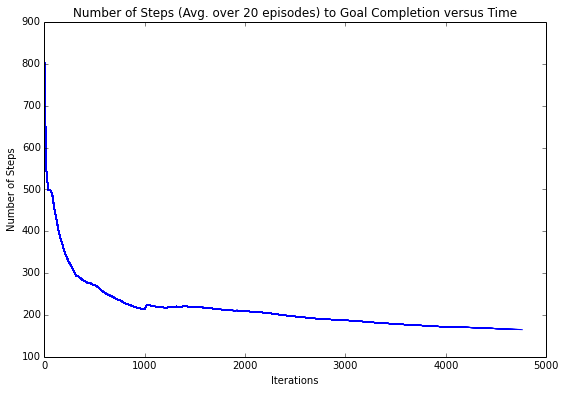

In [40]:
# run the experiment
print experiment(rr_agent, task, NUM_EPISODES=20000)